**Nama : Edmundus Gigih Galih Poetra**

**Kompi : 11**

**SC ID: SC62213**


#1.Load Data

---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stat
from collections import Counter
from imblearn.over_sampling import SMOTE
from pandas import ExcelFile
from scipy import stats


data = pd.read_csv('/content/drive/MyDrive/Startup Campus/heart.csv')
data

Mounted at /content/drive


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


#2.Handling Missing Value

---



In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Dari output di atas, diketahui bahwa data Health Case Study tidak memiliki missing value atau data yang tidak tersedia


#3.Handling Duplicate Value

---



In [ ]:
duplicates=data.duplicated()
print(duplicates)

0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool


In [ ]:
data_akhir=data.drop_duplicates()
print (data_akhir)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     52    1   0       125   212    0        1      168      0      1.0   
1     53    1   0       140   203    1        0      155      1      3.1   
2     70    1   0       145   174    0        1      125      1      2.6   
3     61    1   0       148   203    0        1      161      0      0.0   
4     62    0   0       138   294    1        1      106      0      1.9   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
723   68    0   2       120   211    0        0      115      0      1.5   
733   44    0   2       108   141    0        1      175      0      0.6   
739   52    1   0       128   255    0        1      161      1      0.0   
843   59    1   3       160   273    0        0      125      0      0.0   
878   54    1   0       120   188    0        1      113      0      1.4   

     slope  ca  thal  target  
0        2   2     3       0  
1        0   0     3     

#4.Handling Outlier Data

Data yang akan saya cek untuk melihat apakah terdapat outlier atau tidak yaitu data age, trestbps, chol, thalach, dan oldpeak

---



##Memeriksa Outlier pada Data age

<Axes: ylabel='age'>

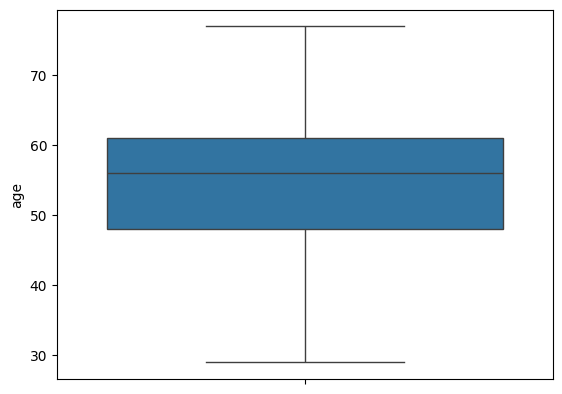

In [ ]:
sns.boxplot(data['age'])

##Memeriksa Outlier pada Data Trestbps

<Axes: ylabel='trestbps'>

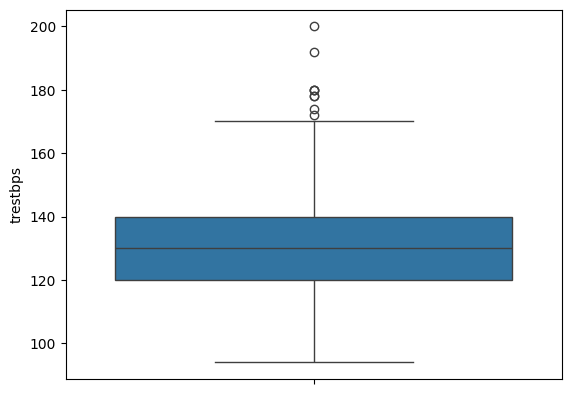

In [ ]:
sns.boxplot(data_akhir['trestbps'])

In [ ]:
Q1= np.percentile(data_akhir['trestbps'],25)
Q3= np.percentile(data_akhir['trestbps'],75)
IQR=Q3-Q1
IQR

20.0

In [ ]:
lower_limit = data_akhir['trestbps']<=(Q1-1.5*IQR)
upper_limit = data_akhir['trestbps']>=(Q3+1.5*IQR)

In [ ]:
# Outlier
data_akhir[lower_limit]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [ ]:
# Outlier
data_akhir[upper_limit]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
29,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0
47,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
65,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0
70,59,1,0,170,326,0,0,140,1,3.4,0,0,3,0
87,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
135,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
151,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
175,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
203,64,1,3,170,227,0,0,155,0,0.6,1,0,3,1


In [ ]:
data_akhir=data_akhir[~lower_limit&~upper_limit]
data_akhir

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


<Axes: ylabel='trestbps'>

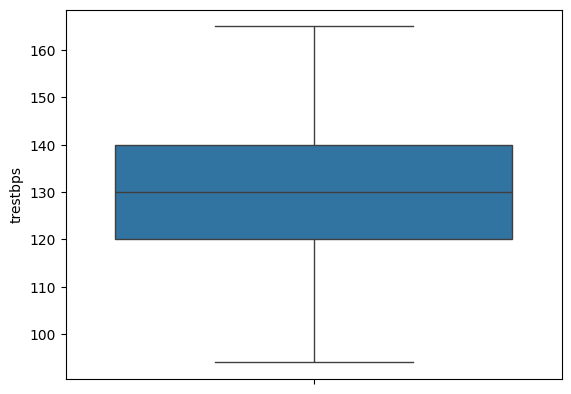

In [ ]:
sns.boxplot(data_akhir['trestbps'])

##Memeriksa Outlier pada Data Chol

<Axes: ylabel='chol'>

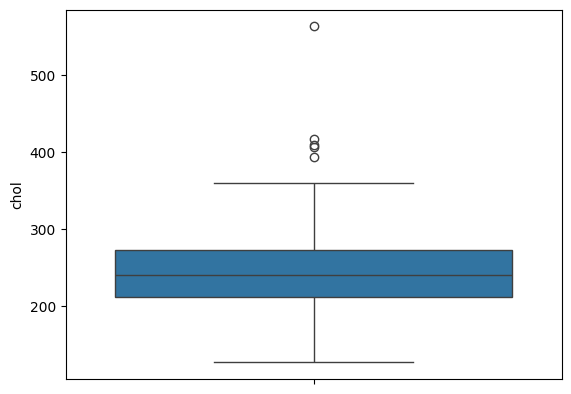

In [ ]:
sns.boxplot(data_akhir['chol'])

In [ ]:
Q1= np.percentile(data_akhir['chol'],25)
Q3= np.percentile(data_akhir['chol'],75)
IQR=Q3-Q1
IQR

62.0

In [ ]:
lower_limit = data_akhir['chol']<=(Q1-1.5*IQR)
upper_limit = data_akhir['chol']>=(Q3+1.5*IQR)

In [ ]:
# Outlier
data_akhir[lower_limit]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [ ]:
# Outlier
data_akhir[upper_limit]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
123,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
158,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
179,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
255,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
450,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0


In [ ]:
data_akhir=data_akhir[~lower_limit&~upper_limit]
data_akhir

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


<Axes: ylabel='chol'>

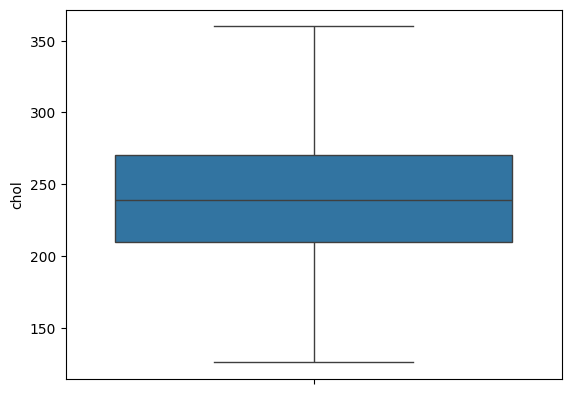

In [ ]:
sns.boxplot(data_akhir['chol'])

##Memeriksa Outlier pada Data Thalach

<Axes: ylabel='thalach'>

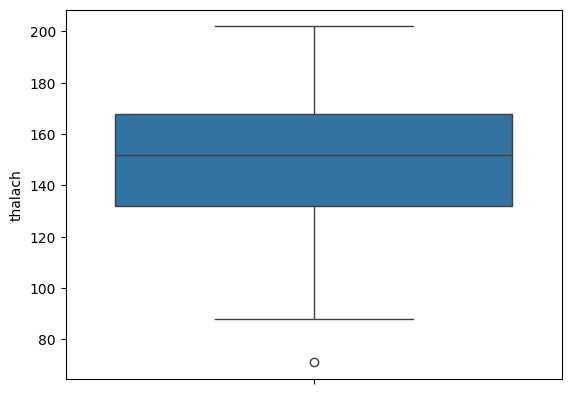

In [ ]:
sns.boxplot(data_akhir['thalach'])

In [ ]:
Q1= np.percentile(data_akhir['thalach'],25)
Q3= np.percentile(data_akhir['thalach'],75)
IQR=Q3-Q1
IQR

36.0

In [ ]:
lower_limit = data_akhir['thalach']<=(Q1-1.5*IQR)
upper_limit = data_akhir['thalach']>=(Q3+1.5*IQR)

In [ ]:
# Outlier
data_akhir[lower_limit]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
267,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0


In [ ]:
# Outlier
data_akhir[upper_limit]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [ ]:
data_akhir=data_akhir[~lower_limit&~upper_limit]
data_akhir

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


<Axes: ylabel='thalach'>

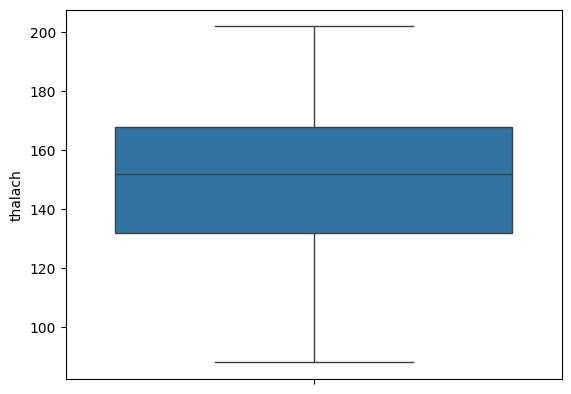

In [ ]:
sns.boxplot(data_akhir['thalach'])

##Memeriksa Outlier dengan Data Oldpeak

<Axes: ylabel='oldpeak'>

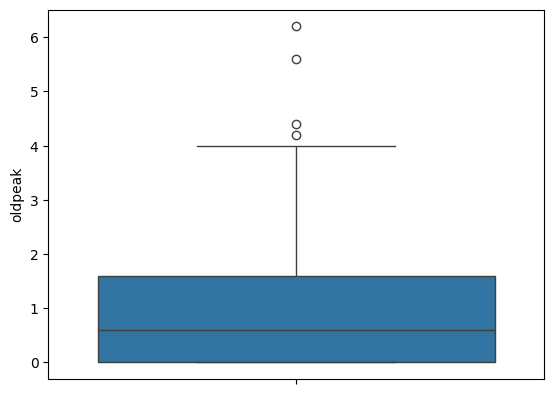

In [ ]:
sns.boxplot(data_akhir['oldpeak'])

In [ ]:
Q1= np.percentile(data_akhir['oldpeak'],25)
Q3= np.percentile(data_akhir['oldpeak'],75)
IQR=Q3-Q1
IQR

1.6

In [ ]:
lower_limit = data_akhir['oldpeak']<=(Q1-1.5*IQR)
upper_limit = data_akhir['oldpeak']>=(Q3+1.5*IQR)

In [ ]:
# Outlier
data_akhir[lower_limit]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [ ]:
# Outlier
data_akhir[upper_limit]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
13,51,1,0,140,298,0,1,122,1,4.2,1,3,3,0
54,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
69,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
77,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0


In [ ]:
data_akhir=data_akhir[~lower_limit&~upper_limit]
data_akhir

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


<Axes: ylabel='oldpeak'>

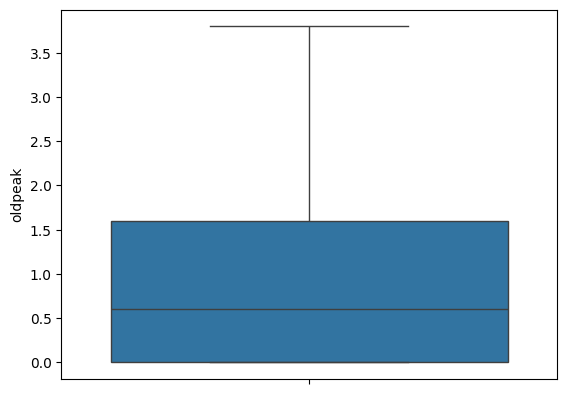

In [ ]:
sns.boxplot(data_akhir['oldpeak'])

##Memeriksa Outlier Data Akhir

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

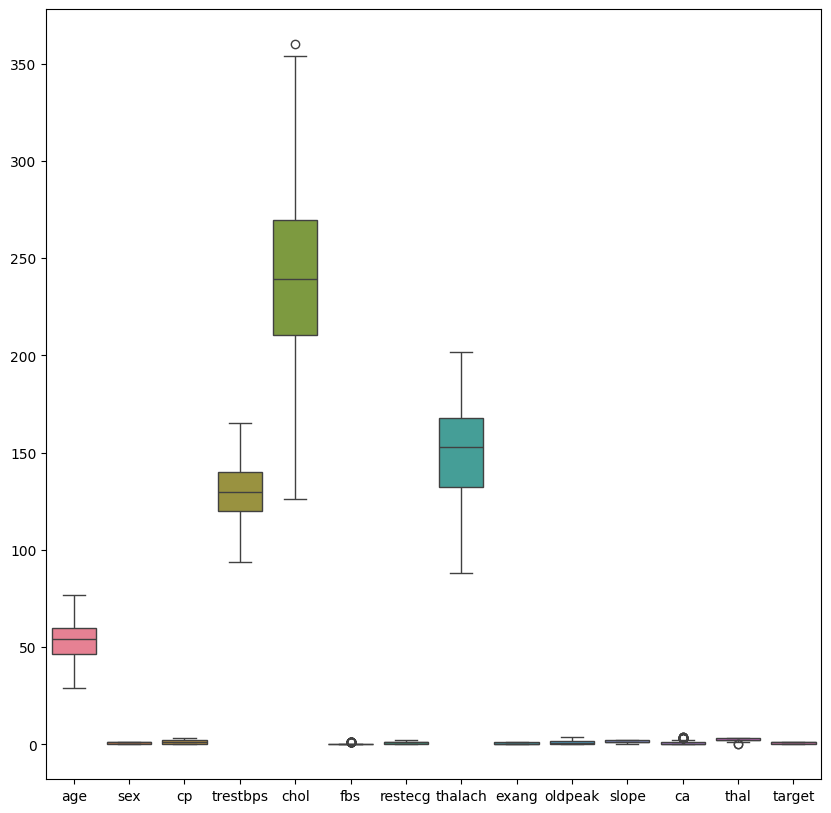

In [ ]:
plt.subplots(figsize=(10, 10))
sns.boxplot(data_akhir)
plt.tight_layout

In [ ]:
#Menghilangkan Outlier pada Variabel chol
Q1= np.percentile(data_akhir['chol'],25)
Q3= np.percentile(data_akhir['chol'],75)
IQR=Q3-Q1
IQR

59.5

In [ ]:
lower_limit = data_akhir['chol']<=(Q1-1.5*IQR)
upper_limit = data_akhir['chol']>=(Q3+1.5*IQR)

In [ ]:
# Outlier
data_akhir[lower_limit]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [ ]:
# Outlier
data_akhir[upper_limit]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
40,65,0,2,160,360,0,0,151,0,0.8,2,0,2,1


In [ ]:
data_akhir=data_akhir[~lower_limit&~upper_limit]
data_akhir

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

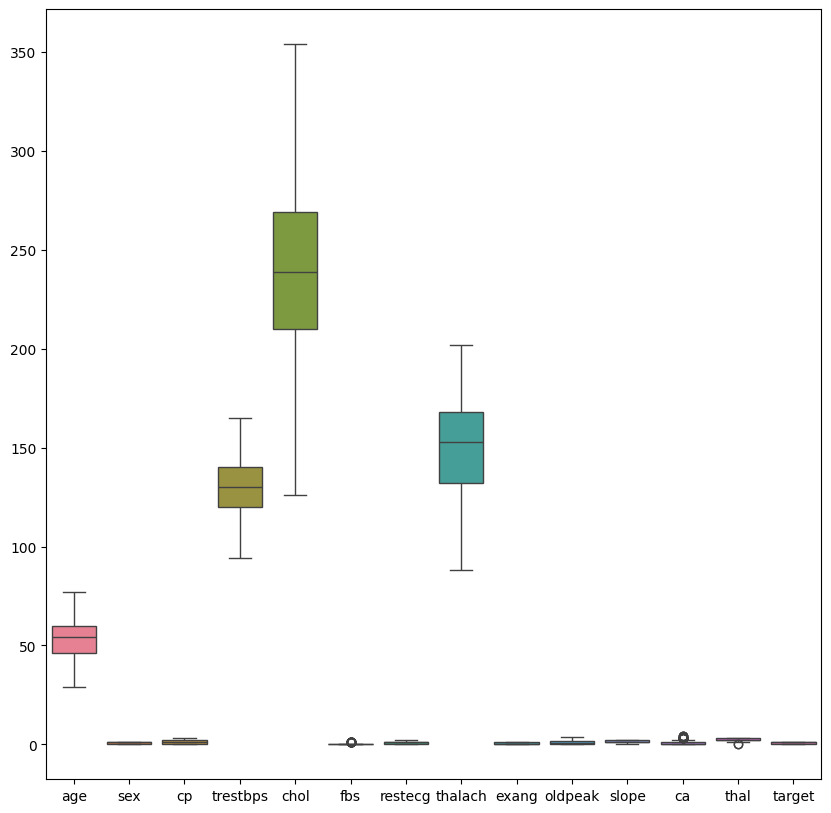

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data_akhir)
plt.tight_layout

Didapatkan data akhir yang sudah dihilangkan outliernya pada data"Age", "Trestbps", "Chol", "Thalach", dan "Oldpeak". Sedangkan untuk outlier pada data "Fbs", "Ca", dan "Thal" tidak diperbaiki dikarenakan data tersebut memiliki type data kategorik.

#5.Handling Imbalancing Data

In [ ]:
data_akhir['sex'].value_counts()

1    194
0     83
Name: sex, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

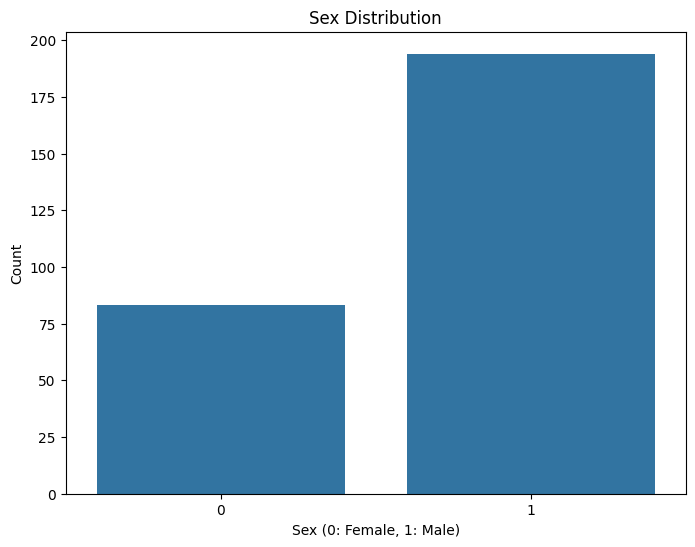

In [ ]:
class_counts= data_akhir['sex'].value_counts() #1 = male, 0 = female
plt.figure(figsize=(8, 6))
plt.title("Sex Distribution")
plt.xlabel("Sex (0: Female, 1: Male)")
plt.ylabel("Count")
sns.countplot(x = data_akhir['sex'])
plt.show

In [ ]:
oversample = SMOTE(random_state=42)  # Set random_state for reproducibility
X_resampled, y_resampled = oversample.fit_resample(data_akhir[['sex']], data_akhir['sex'])

In [ ]:
class_counts = y_resampled.value_counts()
print("Class Distribution (After Oversampling):", class_counts)

Class Distribution (After Oversampling): 1    194
0    194
Name: sex, dtype: int64


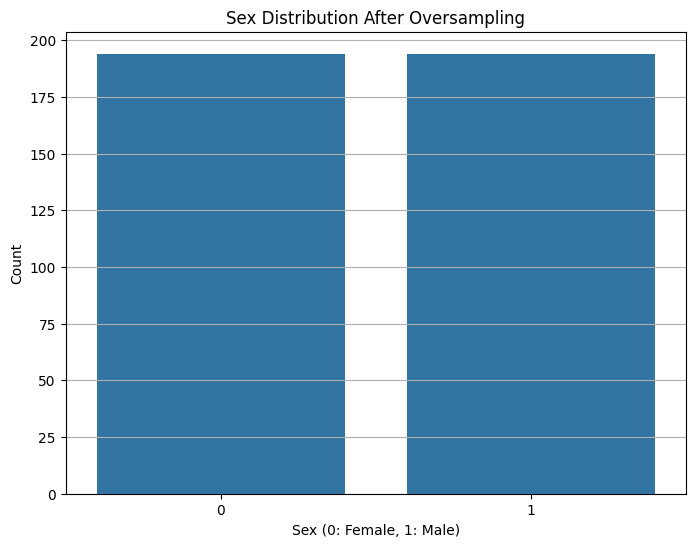

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x=X_resampled['sex'])
plt.title("Sex Distribution After Oversampling")
plt.xlabel("Sex (0: Female, 1: Male)")
plt.ylabel("Count")
plt.grid(axis='y')  # Add grid lines for better readability
plt.show()

#6.Exploratory Data Analysis

##Informasi Data


---
1. age (usia)

2. sex : 1 = male ; 0 = female (jenis kelamin)

3. cp : chest pain type (4 values) (4 nilai kategori dari jenis nyeri dada yang dialami)

4. trestbps : resting blood pressure (tekanan darah saat istirahat)

5. chol : serum cholestoral in mg/dl (ukuran kadar kolesterol dalam mg/dl)

6. fbs : fasting blood sugar > 120 mg/dl, 1 = true ; 0 = false (kadar gula darah, nilai 1 jika benar >120 mg/dl)

7. restecg : resting electrocardiographic results (0 = jantung normal; 1 = jantung abnormal ; 2 = risiko ada penyakit jantung)

8. thalach : maximum heart rate achieved (detak jantung maksimum /menit)

9. exang : exercise induced angina (1 = yes ; 0 = no)

10. oldpeak : ST depression induced by exercise relative to rest (prediksi risiko penyakit jantung)

11. slope : the slope of the peak exercise ST segment (0 = miring ke atas, 1 = datar, 2 = miring ke bawah)

12. ca : number of major vessels (0-3) colored by flourosopy

13. thal: 0 = normal (tidak memiliki thalassemia) ; 1 = fixed defect (memiliki thalassemia permanen) ; 2 = reversable defect (memiliki thallasemia sementara)

14. target : 1 = memiliki risiko penyakit jantung ; 0 = tidak memiliki risiko penyakit jantung


In [ ]:
data_akhir.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       277 non-null    int64  
 1   sex       277 non-null    int64  
 2   cp        277 non-null    int64  
 3   trestbps  277 non-null    int64  
 4   chol      277 non-null    int64  
 5   fbs       277 non-null    int64  
 6   restecg   277 non-null    int64  
 7   thalach   277 non-null    int64  
 8   exang     277 non-null    int64  
 9   oldpeak   277 non-null    float64
 10  slope     277 non-null    int64  
 11  ca        277 non-null    int64  
 12  thal      277 non-null    int64  
 13  target    277 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.5 KB


##Kondisi dan perbedaan penggunaan mean, median, dan modus

1.   Mean

*   Cocok untuk data numerik.
*   Sensitif terhadap outlier (nilai ekstrim).
*   Memberikan informasi tentang "pusat" data.

2.   Median


*   Cocok untuk data numerik dan ordinal
*   Tidak sensitif terhadap outlier


*   Memberikan informasi tentang "titik tengah" data.

3.   Modus


*  cocok untuk data nominal dan ordinal
*   Tidak sensitif terhadap outlier


*   Memberikan informasi tentang nilai yang paling sering muncul


In [ ]:
#Informasi Nilai Mean
features_of_interest = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
print('Informasi Data:')
for feature in features_of_interest:
  # Check if feature exists in the DataFrame
  if feature in data_akhir.columns:
    print(f'- {feature}:')
    print(f'  Mean: {data_akhir[feature].mean()}')

Informasi Data:
- age:
  Mean: 53.891696750902526
- trestbps:
  Mean: 129.15884476534296
- chol:
  Mean: 241.74007220216606
- thalach:
  Mean: 149.9783393501805
- oldpeak:
  Mean: 0.9299638989169676


In [ ]:
#Informasi Nilai Median
features_of_interest = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
print('Informasi Data:')
for feature in features_of_interest:
  # Check if feature exists in the DataFrame
  if feature in data_akhir.columns:
    print(f'- {feature}:')
    print(f'  Median: {data_akhir[feature].median()}')

Informasi Data:
- age:
  Median: 54.0
- trestbps:
  Median: 130.0
- chol:
  Median: 239.0
- thalach:
  Median: 153.0
- oldpeak:
  Median: 0.6


In [ ]:
#Informasi Nilai Modus
features_of_interest = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
print('Informasi Data:')
for feature in features_of_interest:
  # Check if feature exists in the DataFrame
  if feature in data_akhir.columns:
    modus=stats.mode(data_akhir[feature])
    hasil_modus=modus.mode.item()
    print(f'- {feature}:')
    print(f'  Modus: ',hasil_modus)

Informasi Data:
- age:
  Modus:  57
- trestbps:
  Modus:  120
- chol:
  Modus:  197
- thalach:
  Modus:  162
- oldpeak:
  Modus:  0.0


##Menemukan dan mendiskripsikan statistical five summaries

In [ ]:
data_akhir.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000
mean,53.891697,0.700361,0.978339,129.158845,241.740072,0.140794,0.534296,149.978339,0.314079,0.929964,1.433213,0.696751,2.292419,0.563177
std,9.153828,0.458929,1.021277,14.643222,44.055354,0.348439,0.514021,22.916505,0.464988,1.002788,0.595923,0.986369,0.605871,0.496890
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,0.000000,0.000000,120.000000,210.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,153.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,269.000000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,165.000000,354.000000,1.000000,2.000000,202.000000,1.000000,3.800000,2.000000,4.000000,3.000000,1.000000


In [ ]:
features_of_interest = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for feature in features_of_interest:
  if feature in data_akhir.columns:
    print(f'- {feature}:')
    print(f'    Nilai Minimum: {data_akhir[feature].min()}')
    print(f'    Nilai Q1: {data_akhir[feature].quantile(0.25)}')
    print(f'    Nilai Mean: {data_akhir[feature].mean()}')
    print(f'    Nilai Q3: {data_akhir[feature].quantile(0.75)}')
    print(f'    Nilai Maximum: {data_akhir[feature].max()}')

- age:
    Nilai Minimum: 29
    Nilai Q1: 46.0
    Nilai Mean: 53.891696750902526
    Nilai Q3: 60.0
    Nilai Maximum: 77
- trestbps:
    Nilai Minimum: 94
    Nilai Q1: 120.0
    Nilai Mean: 129.15884476534296
    Nilai Q3: 140.0
    Nilai Maximum: 165
- chol:
    Nilai Minimum: 126
    Nilai Q1: 210.0
    Nilai Mean: 241.74007220216606
    Nilai Q3: 269.0
    Nilai Maximum: 354
- thalach:
    Nilai Minimum: 88
    Nilai Q1: 132.0
    Nilai Mean: 149.9783393501805
    Nilai Q3: 168.0
    Nilai Maximum: 202
- oldpeak:
    Nilai Minimum: 0.0
    Nilai Q1: 0.0
    Nilai Mean: 0.9299638989169676
    Nilai Q3: 1.6
    Nilai Maximum: 3.8


##Distribusi Data

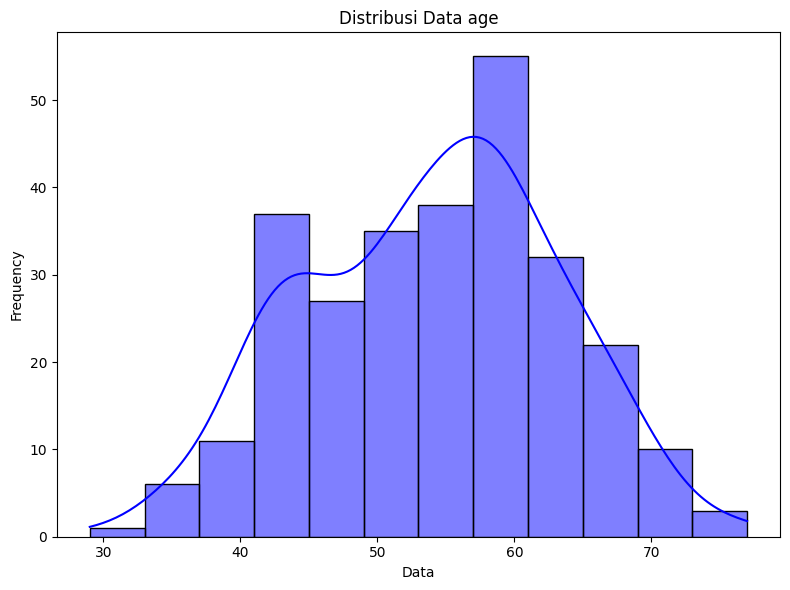

Skewness:-0.11


In [ ]:
from scipy.stats import skew, shapiro, kstest, norm

X = ['age']
for feature in X:
  if feature in data_akhir.columns:
        data_distribusi = data_akhir[feature]
        skewness = stats.skew(data_distribusi)

        fig, ax = plt.subplots(figsize=(8, 6))
        sns.histplot(data_distribusi, kde=True, color='blue', ax=ax)

        ax.set_xlabel('Data')
        ax.set_ylabel('Frequency')
        ax.set_title(f'Distribusi Data {feature}')

        plt.tight_layout()
        plt.show()

print(f"Skewness:{skewness:.2f}")

Dari distribusi data di atas dan berdasarkan nilai skewness yang ada, didapatkan kesimpulan bahwa data lebih condong ke kiri dengan mayoritas data terletak di sebelah kanan nilai (mean), serta menunjukan nilai median lebih besar daripada mean.

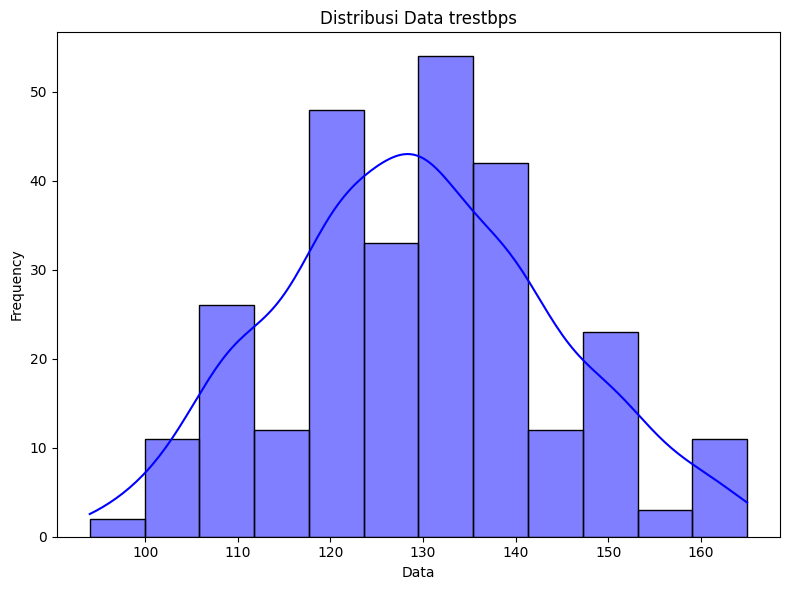

Skewness:0.12


In [ ]:
X = ['trestbps']

for feature in X:
    if feature in data_akhir.columns:
        data_distribusi = data_akhir[feature]
        skewness = stats.skew(data_distribusi)

        fig, ax = plt.subplots(figsize=(8, 6))
        sns.histplot(data_distribusi, kde=True, color='blue', ax=ax)

        ax.set_xlabel('Data')
        ax.set_ylabel('Frequency')
        ax.set_title(f'Distribusi Data {feature}')

        plt.tight_layout()
        plt.show()
print(f"Skewness:{skewness:.2f}")

Dari distribusi data di atas dan berdasarkan nilai skewness yang ada, didapatkan kesimpulan bahwa data lebih condong ke kanan dengan mayoritas data terletak di sebelah kiri nilai (mean), serta menunjukan nilai median lebih kecil daripada mean.

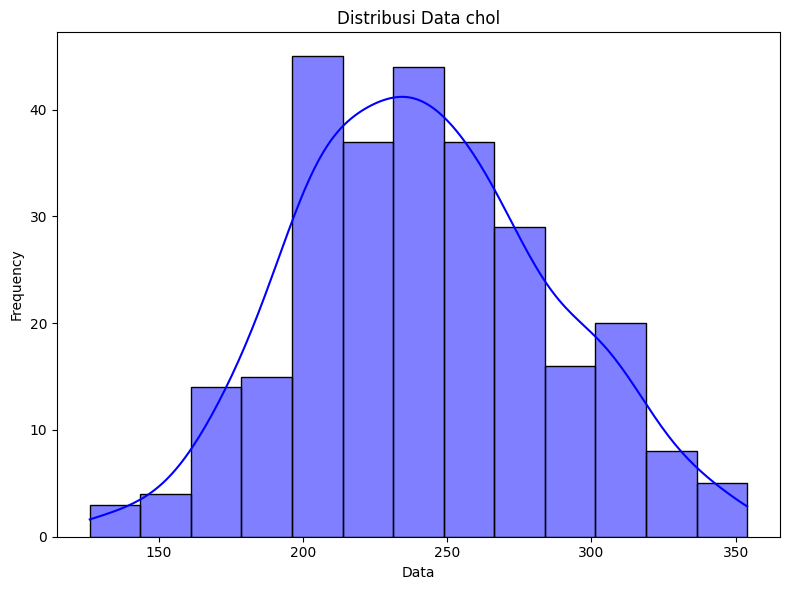

Skewness:0.16


In [ ]:
X = ['chol']

for feature in X:
    if feature in data_akhir.columns:
        data_distribusi = data_akhir[feature]
        skewness = stats.skew(data_distribusi)

        fig, ax = plt.subplots(figsize=(8, 6))
        sns.histplot(data_distribusi, kde=True, color='blue', ax=ax)

        ax.set_xlabel('Data')
        ax.set_ylabel('Frequency')
        ax.set_title(f'Distribusi Data {feature}')

        plt.tight_layout()
        plt.show()
print(f"Skewness:{skewness:.2f}")

Dari distribusi data di atas dan berdasarkan nilai skewness yang ada, didapatkan kesimpulan bahwa data lebih condong ke kanan dengan mayoritas data terletak di sebelah kiri nilai (mean), serta menunjukan nilai median lebih kecil daripada mean.

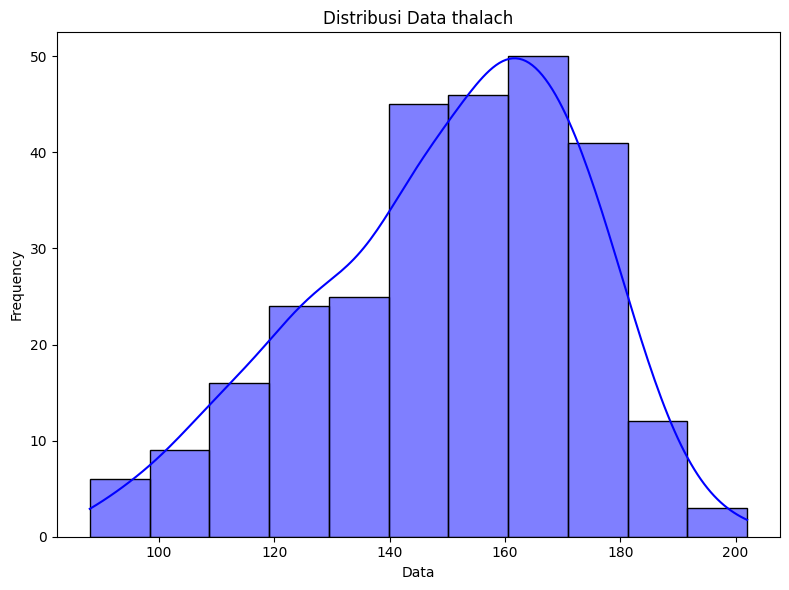

Skewness:-0.48


In [ ]:
X = ['thalach']

for feature in X:
    if feature in data_akhir.columns:
        data_distribusi = data_akhir[feature]
        skewness = stats.skew(data_distribusi)

        fig, ax = plt.subplots(figsize=(8, 6))
        sns.histplot(data_distribusi, kde=True, color='blue', ax=ax)

        ax.set_xlabel('Data')
        ax.set_ylabel('Frequency')
        ax.set_title(f'Distribusi Data {feature}')

        plt.tight_layout()
        plt.show()
print(f"Skewness:{skewness:.2f}")

Dari distribusi data di atas dan berdasarkan nilai skewness yang ada, didapatkan kesimpulan bahwa data lebih condong ke kiri dengan mayoritas data terletak di sebelah kanan nilai (mean), serta menunjukan nilai median lebih besar daripada mean.

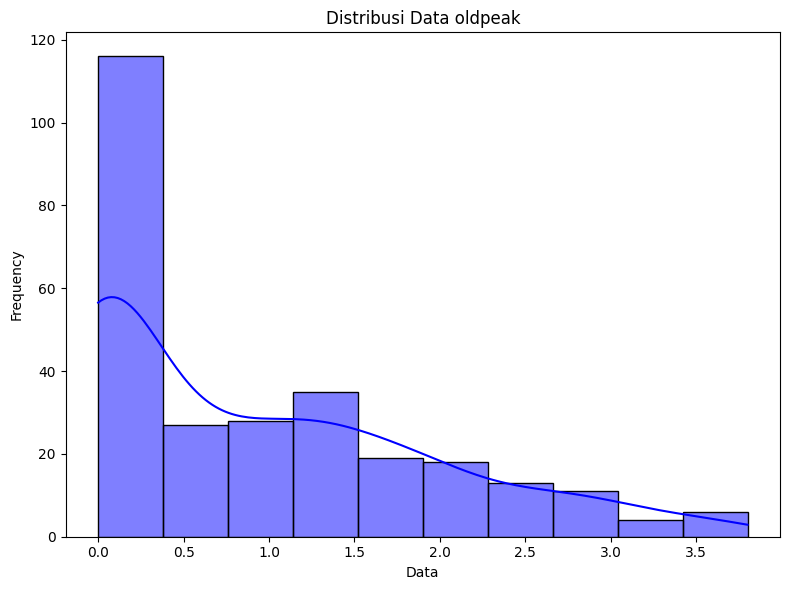

Skewness:0.90


In [ ]:
X = ['oldpeak']

for feature in X:
    if feature in data_akhir.columns:
        data_distribusi = data_akhir[feature]
        skewness = stats.skew(data_distribusi)


        fig, ax = plt.subplots(figsize=(8, 6))
        sns.histplot(data_distribusi, kde=True, color='blue', ax=ax)

        ax.set_xlabel('Data')
        ax.set_ylabel('Frequency')
        ax.set_title(f'Distribusi Data {feature}')

        plt.tight_layout()
        plt.show()
print(f"Skewness:{skewness:.2f}")

Dari distribusi data di atas dan berdasarkan nilai skewness yang ada, didapatkan kesimpulan bahwa data lebih condong ke kanan dengan mayoritas data terletak di sebelah kiri nilai (mean), serta menunjukan nilai median lebih kecil daripada mean.

#7.Feature Engineering

## Correlation Heatmap

<Axes: >

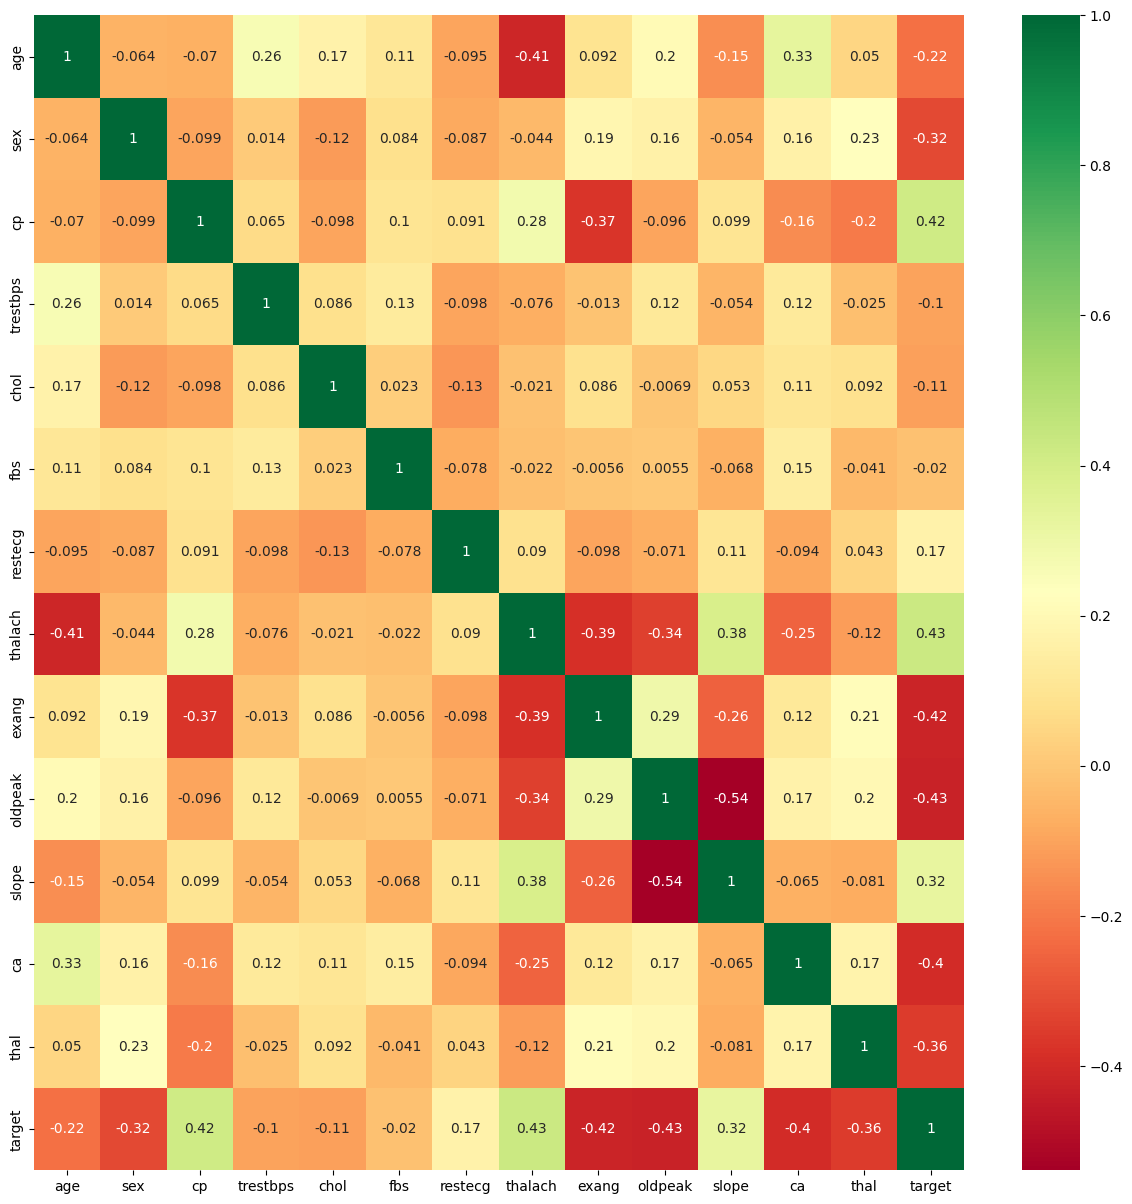

In [ ]:
corr_matrix=data_akhir.corr()
top_corr_features=corr_matrix.index

plt.figure(figsize=(15,15))
sns.heatmap(data=data_akhir[top_corr_features].corr(),annot=True,cmap='RdYlGn')

Correlation heatmap ini bertujuan untuk melihat korelasi antara dua variabel atau lebih dalam bentuk matriks.

In [ ]:
data_akhir

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


## 1.Distribusi Usia dengan Status Penyakit Jantung

<ipython-input-97-f448b1564ebc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_akhir['target'] = data_akhir['target'].replace({0: 'No Disease', 1: 'Disease'})


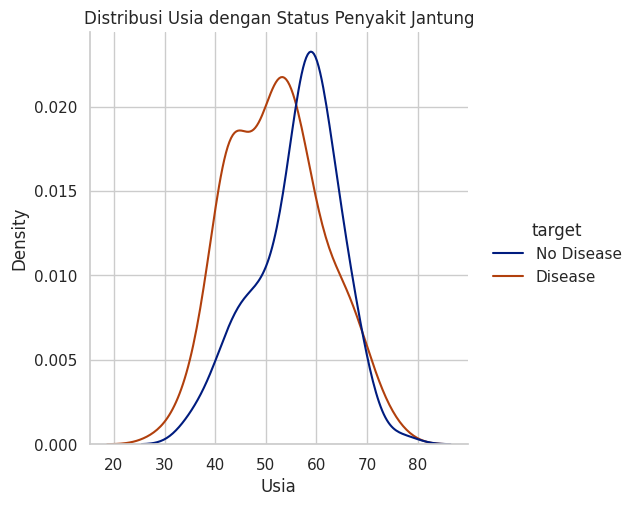

In [ ]:
sns.set(style="whitegrid")

data_akhir['target'] = data_akhir['target'].replace({0: 'No Disease', 1: 'Disease'})

sns.displot(data_akhir, x="age", hue="target", kind="kde", palette="dark")
plt.title('Distribusi Usia dengan Status Penyakit Jantung')
plt.xlabel('Usia')
plt.ylabel('Density')

# Menampilkan plot
plt.show()

Observasi tersebut menunjukkan bahwa rentang usia **45-60** tahun memiliki kecenderungan lebih tinggi untuk mengalami risiko penyakit jantung. Oleh karena itu, pada rentang usia ini, **langkah-langkah** pencegahan menjadi sangat penting. Beberapa upaya pencegahan yang dapat dilakukan meliputi:



*   Memperhatikan pola makan dengan menghindari makanan tingga lemak, gula, dan olahan yang tinggi sodium
*  Melakukan aktivitas fisik secara teratur
- Rutin melakukan pemeriksaan kesehatan untuk memantau kondisi jantung


Dengan memperhatikan langkah-langkah pencegahan ini, seseorang dapat mengurangi risiko terkena penyakit jantung dan menjaga kesehatan jantung yang optimal, terutama saat memasuki rentang usia yang lebih rentan terhadap penyakit tersebut.


## 2.Rasio Risiko terkena Penyakit Jantung Berdasarkan jenis kelamin

<ipython-input-75-ef842a27a241>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_xticklabels(['Female','Male'])


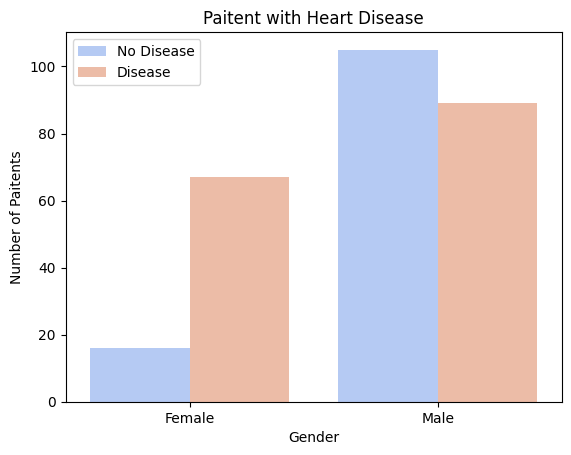

sex,0,1
target,,
0,16,105
1,67,89


In [ ]:
fig = sns.countplot(data_akhir, x = 'sex', palette='coolwarm', hue='target')

fig.set_xticklabels(['Female','Male'])

plt.title('Paitent with Heart Disease')
plt.xlabel('Gender')
plt.ylabel('Number of Paitents')
plt.legend(['No Disease', 'Disease'])
plt.show()

crosstab = pd.crosstab(data_akhir['target'], data_akhir['sex'])
crosstab

In [ ]:
#Total penyakit untuk wanita dan pria
total_disease_female = crosstab.loc[1, 0]
total_disease_male = crosstab.loc[1, 1]

#Total penyakit secara keseluruhan
total_disease = total_disease_female + total_disease_male

female_disease_ratio_total = (total_disease_female / total_disease).round(3)
male_disease_ratio_total = (total_disease_male / total_disease).round(3)

print("Rasio wanita terkena penyakit jantung:", female_disease_ratio_total)
print("Rasio pria terkena penyakit jantung:", male_disease_ratio_total)

Rasio wanita terkena penyakit jantung: 0.429
Rasio pria terkena penyakit jantung: 0.571


Dari hasil analisis di atas, dapat diambil kesimpulan bahwa laki laki memiliki rasio risiko terkena penyakit jantung lebih tinggi dari pada perempuan, dimana laki-laki memiliki nilai rasio sebesar **57,1%** dan wanita memiliki rasio risiko sebesar **42,9%.**

##3.Rata-Rata Tekanan Darah Saat Istirahat Berdasarkan Jenis Kelamin

In [ ]:
average_trestbps=data_akhir.groupby('sex')['trestbps'].mean()
print("Rata-Rata Tekanan Darah saat Istirahat Berdasarkan Jenis Kelamin:")
print(average_trestbps)

Rata-Rata Tekanan Darah Resting Berdasarkan Jenis Kelamin:
sex
0    128.855422
1    129.288660
Name: trestbps, dtype: float64


 Berdasarkan  data analisis di atas, didapatkan rata-rata tekanan darah pria saat istirahat memiliki tekanan yang lebih tinggi dari pada wanita, yaitu di angka **129,29 mmHg** sedangkan wanita berada di angka **128,86 mmHG**. Namun, kedua rata rata tersebut berada di atas **120/80** mmHg yang mana hal ini menunjukan bahwa dari data tersebut banyak wanita dan pria yang terkena **hipertensi** dan rentan untuk mengidap penyakit jantung.

Untuk menindaklanjuti hal tersebut, diperlukan perubahan gaya hidup dengan **olahraga teratur**, **pengurangan konsumsi garam**, serta **meminum obat obatan yang diperlukan**.



## 4.Rasio Pasien Pengidap Thalesmia yang Terkena penyakit jantung berdasarkan Jenis Kelamin

In [ ]:
thalassemia= data_akhir[data_akhir['thal'] != 0]
thalassemia_heart_disease_count = thalassemia.groupby('sex')['target'].sum()
thalassemia_total_count = thalassemia['sex'].value_counts()
thalassemia_heart_disease_ratio = thalassemia_heart_disease_count / thalassemia_total_count

print("Rasio pasien yang mengidap thalassemia dan terkena penyakit jantung berdasarkan gender:")
print(thalassemia_heart_disease_ratio)

Rasio pasien yang mengidap thalassemia dan terkena penyakit jantung berdasarkan gender:
0    0.804878
1    0.461140
dtype: float64


Berdasarkan hasil analisis di atas, didapatkan kesimpulan bahwa:


*   Pasien dengan jenis kelamin wanita (sex=0) memiliki rasio pasien yang mengidap thalassemia dan terkena penyakit jantung adalah sekitar 0.805 atau jika di presentasekan yaitu 80,5% dari total pasien wanita yang mengidap thalassemia.
*   Pasien dengan jenis kelamin pria (sex=1) memiliki rasio pasien yang mengidap thalassemia dan terkena penyakit jantung adalah sekitar 0.461 atau jika di presentasekan yaitu 46,1% dari total pasien pria yang mengidap thalassemia.

Sehingga berdasarkan data, rasio pasien berjenis kelamin wanita yang mengidap thalassemia memiliki kencederungan lebih tinggi untuk mengidap penyakit jantung ketimbang pasien yang berjenis kelamin pria.



## 5.Rasio Wanita Pengidap Thalassemia yang Terkena Penyakit Jantung

In [ ]:
perempuan_thalassemia = thalassemia[thalassemia['sex'] == 0]
perempuan_yang_terkena_penyakit_jantung= perempuan_thalassemia.groupby('thal')['target'].sum()
total_perempuan_thalassemia = perempuan_thalassemia['thal'].value_counts()
rasio_perempuan_yang_terkena_penyakit_jantung = perempuan_yang_terkena_penyakit_jantung / total_perempuan_thalassemia
rasio_perempuan_yang_terkena_penyakit_jantung.index = ['Thalassemia Permanen', 'Thalassemia Sementara']

print("Rasio pasien wanita yang mengidap thalassemia dan terkena penyakit jantung berdasarkan jenis thalassemia:")
print(rasio_perempuan_yang_terkena_penyakit_jantung)


Rasio pasien wanita yang mengidap thalassemia dan terkena penyakit jantung berdasarkan jenis thalassemia:
Thalassemia Permanen     0.890411
Thalassemia Sementara    0.111111
dtype: float64


Pada hasil analisis didapati bahwa rasio wanita pengidap thalassemia permanen yang terkena penyakit jantung yaitu sebesar **0,890 atau 89% **dan rasio wanita pengidap thalassemia sementara yang terkena penyakit jantung yaitu sebesar* *0,111* atau 11,1%.**

Rasio yang tinggi paa pengidap thalassemia permanen ini disebabkan karena adanya beberapa faktor yang juga turut mempengaruhi seperti adanya **anemia kronis**, **perubahan hemodinamik** dan adanya **korelasi genetik**.

Untuk mencegah risiko terkena penyakit thalassemia permanen terkena penyakit jantung yaitu dapat dilakukan dengan beberapa cara seperti **terapi kelas besi**, **perubahan gaya hidup** dan juga dilakukan **pemantauan dan pengobatan komplikasi pada jantung.**

##6.Rasio Pasien yang memiliki Jantung Normal, Jantung Abnormal dan Berisiko mempunyai Penyakit Jantung

In [ ]:
count_normal = data_akhir[(data_akhir['restecg'] == 0) & (data_akhir['target'] == 1)].shape[0]
count_abnormal = data_akhir[(data_akhir['restecg'] == 1) & (data_akhir['target'] == 1)].shape[0]
count_risk = data_akhir[(data_akhir['restecg'] == 2) & (data_akhir['target'] == 1)].shape[0]

total_risk = count_normal + count_abnormal + count_risk

ratio_normal = count_normal / total_risk
ratio_abnormal = count_abnormal / total_risk
ratio_risk = count_risk / total_risk

print("Rasio Pasien dengan Jantung Normal: {:.4f}".format(ratio_normal))
print("Rasio Pasien dengan Jantung Abnormal: {:.4f}".format(ratio_abnormal))
print("Rasio Pasien dengan Risiko Penyakit Jantung: {:.4f}".format(ratio_risk))

Rasio Pasien dengan Jantung Normal: 0.3974
Rasio Pasien dengan Jantung Abnormal: 0.5962
Rasio Pasien dengan Risiko Penyakit Jantung: 0.0064


Dari hasil analisis, didapatkan rasio pasien dengan jantung normal sebesar **0.3974**, rasio pasien dengan jantung abnormal sebesar **0.5962**, dan rasio pasien dengan risiko penyakit jantung sebesar **0.0064.**
Hal tersebut menunjukan bahwa terdapa **39,74%** pasien yang memiliki jantung normal, **59,62%** pasien yang memiliki jantung abnormal dan **0,64%**pasien yang memiliki risiko terkena penyakit jantung.

 ## 7.Rasio Pasien yang Memiliki Jantung Normal, Abnormal, dan Risiko Penyakit Jantung yang Terkena Penyakit Jantung

In [ ]:
data_terkena_jantung = data_akhir[(data_akhir['restecg'] != 0) & (data_akhir['target'] == 1)]

# Menghitung jumlah pasien untuk setiap kategori restecg
count_normal = data_terkena_jantung[data_terkena_jantung['restecg'] == 0].shape[0]
count_abnormal = data_terkena_jantung[data_terkena_jantung['restecg'] == 1].shape[0]
count_risk = data_terkena_jantung[data_terkena_jantung['restecg'] == 2].shape[0]

# Menghitung total pasien yang memiliki risiko penyakit jantung
total_risk = count_normal + count_abnormal + count_risk

# Menghitung rasio pasien dengan jantung normal, abnormal, dan berisiko yang terkena penyakit jantung
ratio_normal = count_normal / total_risk
ratio_abnormal = count_abnormal / total_risk
ratio_risk = count_risk / total_risk

print("Rasio Pasien dengan Jantung Normal yang Terkena Penyakit Jantung: {:.3f}".format(ratio_normal))
print("Rasio Pasien dengan Jantung Abnormal yang Terkena Penyakit Jantung: {:.3f}".format(ratio_abnormal))
print("Rasio Pasien dengan Risiko Penyakit Jantung yang Terkena Penyakit Jantung: {:.3f}".format(ratio_risk))

Rasio Pasien dengan Jantung Normal yang Terkena Penyakit Jantung: 0.000
Rasio Pasien dengan Jantung Abnormal yang Terkena Penyakit Jantung: 0.989
Rasio Pasien dengan Risiko Penyakit Jantung yang Terkena Penyakit Jantung: 0.011


Dari hasil analisa, didapati bahwa **tidak ada** pasien yang memiliki jantung normal yang terkena penyakit jantung, sedangkan terdapat **98,9%** pasien yang memiliki jantung abnormal yang terkena penyakit jantung dan **1,1%** pasien yang memiliki risiko terkena penyakit jantung yang terkena penyakit jantung.

Tingginya orang yang memiliki jantung abnormal yang terkena penyakit jantung dapat dicegah dengan melakukan beberapa cara pencegahan seperti menerapkan pola makan yang sehat, rutin berolahraga, menjaga berat badan, mengelola stress, dan menghindari rokok serta alkohol


##8.Rasio Pasien yang Memiliki Jantung Abnormal dan Terkena Penyakit Diabetes yang memiliki penyakit jantung

In [ ]:
# Menghitung jumlah pasien dengan jantung abnormal dan terkena penyakit diabetes yang juga mengidap penyakit jantung
count_abnormal_heart_disease_diabetes = data_akhir[(data_akhir['restecg'] == 1) & (data_akhir['fbs'] == 1) & (data_akhir['target'] == 1)].shape[0]

# Menghitung total pasien yang mengidap penyakit jantung
total_heart_disease = data_akhir[data_akhir['target'] == 1].shape[0]

# Menghitung rasio pasien dengan jantung abnormal dan terkena penyakit diabetes yang juga mengidap penyakit jantung
ratio_abnormal_heart_disease_diabetes = count_abnormal_heart_disease_diabetes / total_heart_disease

print("Rasio Pasien = {:.3f}".format(ratio_abnormal_heart_disease_diabetes))

Rasio Pasien = 0.068


Dari observasi di atas, rasio pasien dengan jantung abnormal dan terkena penyakit diabetes yang juga mengidap penyakit jantung adalah **0.068**, yang berarti sekitar **6.8%** dari total pasien yang memiliki penyakit jantung juga mengalami kondisi jantung abnormal dan diabetes.


Kehadiran diabetes juga menjadi faktor risiko tambahan bagi pasien. Kombinasi ini dapat saling memperburuk risiko penyakit jantung. Misalnya, diabetes dapat memperburuk kerusakan pembuluh darah yang terkait dengan kondisi jantung abnormal, sementara kondisi jantung abnormal dapat membuat jantung lebih rentan terhadap komplikasi yang terkait dengan diabetes. Oleh karena itu, penanganan yang tepat dan pengendalian yang baik terhadap diabetes dan kondisi jantung abnormal sangat penting untuk mencegah atau mengelola penyakit jantung dengan efektif.

##9.Rata-Rata Tekanan Darah Istirahat untuk Setiap Jenis Nyeri Dada

In [ ]:
mean_trestbps_by_cp = data_akhir.groupby('cp')['trestbps'].mean()

print("Rata-rata tekanan darah istirahat untuk setiap jenis nyeri dada:")
print(mean_trestbps_by_cp)

Rata-rata tekanan darah istirahat untuk setiap jenis nyeri dada:
cp
0    132.213280
1    128.119760
2    130.077465
3    140.961039
Name: trestbps, dtype: float64


Berdasarkan hasil observasi di atas jenis **nyeri dada 0** memiliki rata rata tekanan darah saat istirahat sebesar **132.21 mmHg**, lalu jenis **nyeri dada 1** memiliki rata rata tekanan darah saat istirahat sebesar **128,12 mmHg**, jenis **nyeri dada 2** memiliki rata rata tekanan darah saat istirahat sebesar **130.08 mmHg**, dan yang terakhir jenis **nyeri dada 3** memiliki rata rata tekanan darah saat istirahat sebesar **140.96 mmHg**.


Rata-rata tekanan darah istirahat yang lebih tinggi pada jenis nyeri dada tertentu, seperti jenis **nyeri dada 3**, dapat menunjukkan adanya **peningkatan risiko terhadap penyakit jantung**.

##10.Rasio Kolestrol (chol) terhadap Detak Jantung Maksimsum (thalach)

In [ ]:
data_akhir['chol_thalach_ratio'] = data_akhir['chol'] / data_akhir['thalach']

<ipython-input-100-ddbc7f54d05b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_akhir['chol_thalach_ratio'] = data_akhir['chol'] / data_akhir['thalach']


In [ ]:
print("Nilai minimum dari rasio chol_thalach:", data_akhir['chol_thalach_ratio'].min())
print("Nilai maksimum dari rasio chol_thalach:", data_akhir['chol_thalach_ratio'].max())

Nilai minimum dari rasio chol_thalach: 0.7283236994219653
Nilai maksimum dari rasio chol_thalach: 3.1136363636363638


Di sini, observasi menunjukkan bahwa nilai maksimum yang tinggi dari rasio antara kadar kolesterol dan detak jantung mungkin mengindikasikan adanya hubungan yang signifikan antara kedua faktor tersebut. Hal ini menimbulkan kekhawatiran bahwa individu dengan kadar kolesterol tinggi mungkin memiliki detak jantung maksimum yang rendah. Kondisi ini bisa menjadi perhatian serius karena detak jantung maksimum yang rendah dapat menjadi indikator penurunan fungsi jantung atau meningkatnya risiko kesehatan, terutama dalam konteks penyakit kardiovaskular. Oleh karena itu, diperlukan analisis dan pemeriksaan lebih lanjut terhadap individu yang memiliki nilai rasio tersebut agar dapat diinvestigasi lebih lanjut dan ditindaklanjuti sesuai kebutuhan medis.